<a href="https://colab.research.google.com/github/Ymin-2/ESAA/blob/main/ESAA_YB_WEEK05_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**분류(Classification)의 개요**

: 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고,  
생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값 예측  
= 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블 판별

* 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
* 데이터 균일도에 따른 규칙 기반의 결정 트리
* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
* 근접 거리를 기준으로 하는 최소 근접 알고리즘
* 심층 연결 기반의 신경망
* 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블

<앙상블>  
* 배깅
  - 랜덤 포레스트: 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성
* 부스팅
  - 그래디언트 부스팅: 뛰어난 예측 성능, 긴 수행 시간
  - XgBoost, LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 발전시키면서 수행 시간을 단축
* 결정 트리: 앙상블의 기본 알고리즘으로 사용하는 것
  - 매우 쉽고 유연하게 적용될 수 있는 알고리즘
  - 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
  - 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 함
  - 이로 인한 과적합이 발생해 예측 성능이 저하될 수 있음
  - 앙상블은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 업데이트하면서 예측 성능을 향상, 이때 결정 트리가 좋은 약한 학습기가 됨

#**결정 트리**
- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듦
<img src = 'https://drive.google.com/uc?id=1F_12qbt9hH5miyB4smtPyVkTMoxSVRVe'>

- 규칙 노드로 표시된 노드: 규칙 조건
- 리프 노드로 표시된 노드: 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리가 생성
- 데이터 세트에 피처가 있고 이런 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐
- 많은 규칙은 과적합으로 이어지기 쉬움
- = 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
- 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦  
= 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값 예측

<정보의 균일도를 측정하는 방법>
* 정보 이득: 엔트로피 개념 기반  
정보 이득 지수: 1-엔트로피 지수 -> 분할 기준 정함  
정보 이득이 높은 속성을 기준으로 분할
* 지니 계수: 0(평등) -> 1(불평등)  
지니 계수가 낮을수록 데이터 균일도가 높음  
지니 계수가 낮은 속성을 기준으로 분할

결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수 이용

##**결정 트리 모델의 특징**

장점
* 정보의 '균일도'라는 룰을 기반으로 해 알고리즘이 쉽고 직관적임
* 룰이 명확, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현 가능
* 정보의 균일도만 신경 쓰면 됨 -> 각 피처의 스케일링과 정규화 같은 전처리 작업 필요X

단점
* 과적합으로 정확도가 떨어짐
* 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 더 도움이 됨

##**결정 트리 파라미터**
결정 트리 알고리즘을 구현한 클래스: DecisionTreeClassifier, DecisionTreeRegressor

DecisionTreeClassifier: 분류를 위한 클래스  
DecisionTreeRegressor: 회귀를 위한 클래스

##**결정 트리 모델의 시각화**
Graphviz 패키지 사용  
사이킷런의 export_graphviz()는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리슽, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌

In [ ]:
# 붓꽃 데이터 세트를 DecisionTreeClassifier를 이용해 학습한 뒤 어떤 형태로 규칙 트리가 만들어지는 지 확인
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

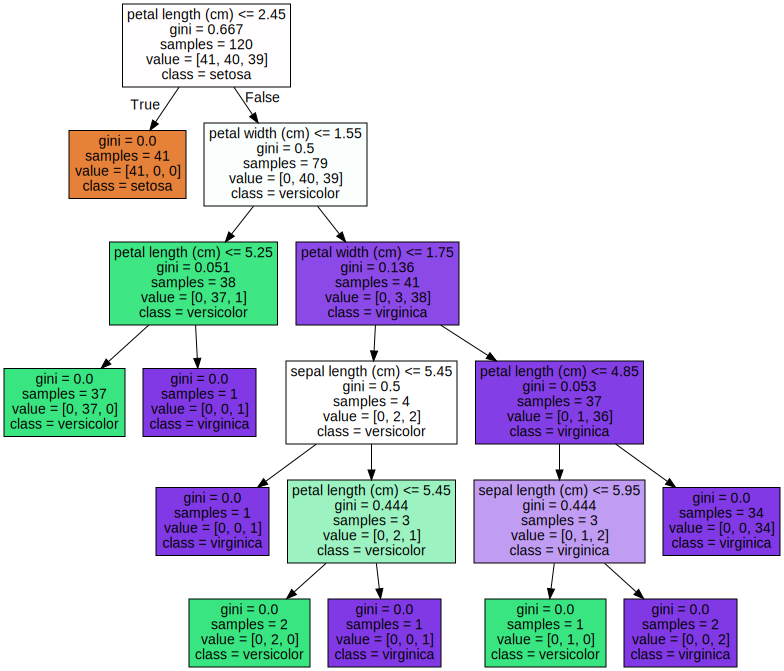

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

* 리프 노드: 더 이상 자식 노드가 없는 노드  
  - 최종 클래스(레이블) 값이 결정되는 노드
  - 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족
* 브랜치 노드: 자식 노드가 있는 노드
  - 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음
* petal length(cm) < = 2.45와 같이 피처의 조건이 있는 것: 자식 노드를 만들기 위한 규칙 조건
  - 이 조건이 없으면 리프 노드
* gini: 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
* samples: 현 규칙에 해당하는 데이터 건수
* value = []: 클래스 값 기반의 데이터 건수
* 각 노드의 색깔: 붓꽃 데이터의 레이블 값
  - 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음

* max_depth: 결정 트리의 최대 트리 깊이 제어

* min_samples_split: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

* min_samples_leaf: 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수 지정

* feature_importances_: ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨
  - 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

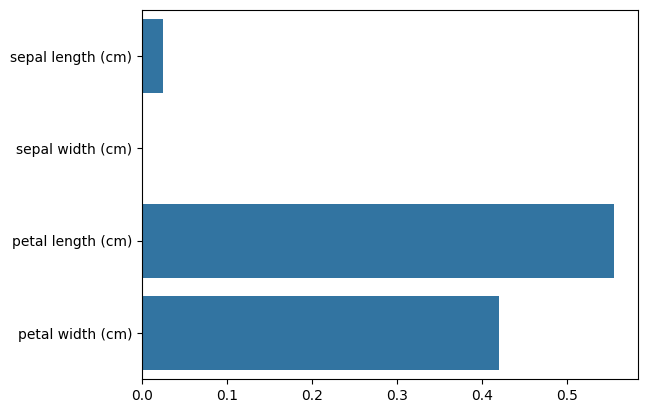

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

##**결정 트리 과적합(Overfitting)**

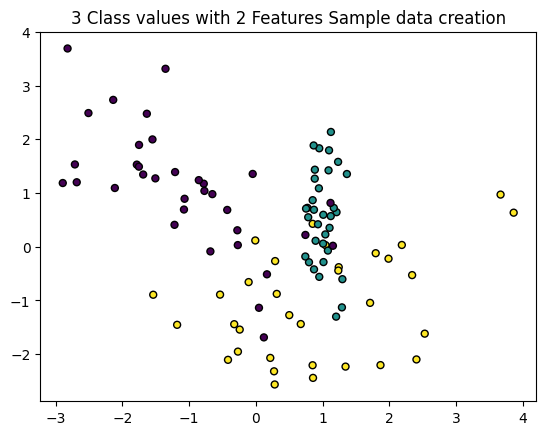

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')

<X_features와 y_labels 데이터 세트를 기반으로 결정 트리 학습>  
첫 번째 학습: 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=25, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

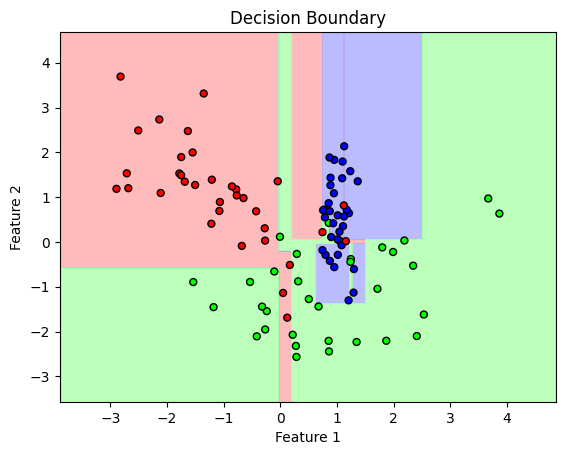

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

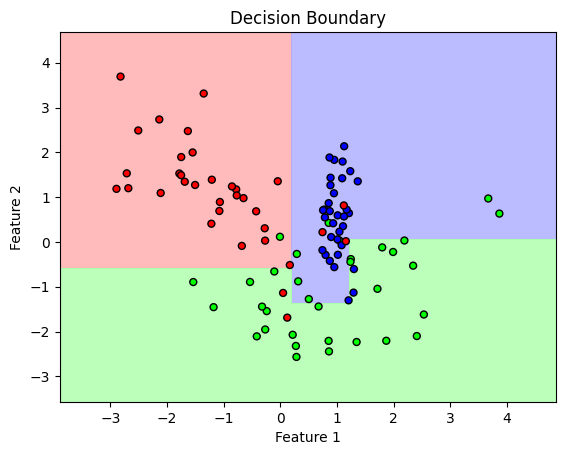

In [ ]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

##**결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/Data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음

In [ ]:
# 중복되 피처명이 얼마나 있는지 파악
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
# 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()생성
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [ ]:
# train 디렉터리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트, test 디렉터리에 있는 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame에 로드
import pandas as pd

def get_human_dataset():
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/Data/human_activity/features.txt', sep='\s+',
                                header = None, names = ['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df() 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/ESAA/Data/human_activity/train/X_train.txt', sep='\s+', names = feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/ESAA/Data/human_activity/test/X_test.txt', sep='\s+', names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/ESAA/Data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/ESAA/Data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])


  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
# 로드한 학습용 피처 데이터 세트 간략히 살펴보기
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
# DecisionTreeClassifier의 하이퍼 파라미터는 모두 디폴트 값으로 설정해 수행, 이때의 하이퍼 파라미터 값을 모두 추출
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [17]:
# 결정 트리의 트리 깊이가 예측 정확도에 주는 영향 살펴보기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [18]:
# 5개의 CV 세트에서 max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_results_ 속성을 통해 살펴보기

# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [19]:
# 별도의 테스트 데이터 세트에서 결정 트리의 정확도 측정
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [20]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [21]:
# grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습이 완료된 Estimator 객체
# 이를 이용해 테스트 데이터 세트에 예측 수행
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


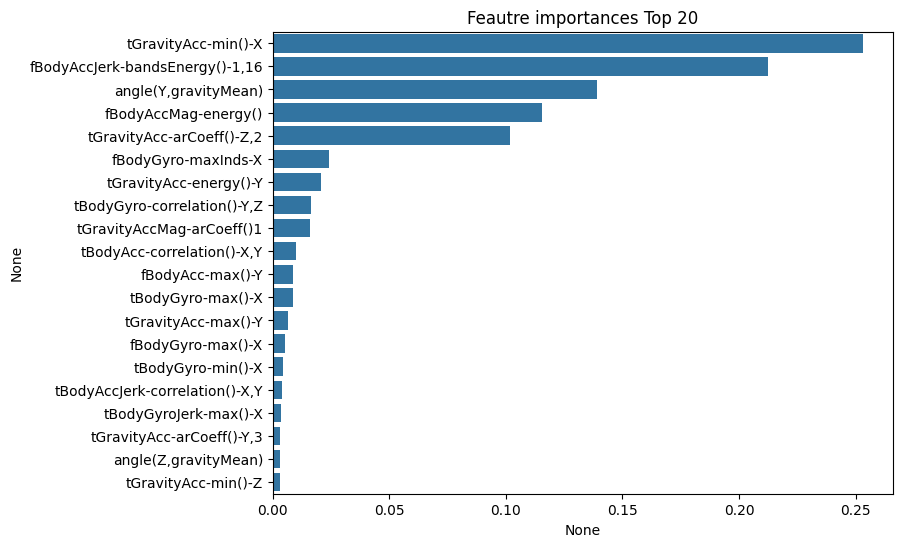

In [23]:
# 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성 이용해 알아보기
# 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feautre importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()